## Heart Disease Dataset 심장질환 데이터셋

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

| 번호 | 특성명                                   | 컬럼명       | 설명                                                                 |
|------|------------------------------------------|--------------|----------------------------------------------------------------------|
| 1    | age                                      | age          | 나이                                                                |
| 2    | sex                                      | sex          | 성별                                                                |
| 3    | chest pain type                          | cp           | 흉통 유형 (4가지 값)                                                |
| 4    | resting blood pressure                   | trestbps     | 휴지기 혈압                                                         |
| 5    | serum cholestoral in mg/dl               | chol         | 혈청 콜레스테롤 (mg/dl)                                             |
| 6    | fasting blood sugar > 120 mg/dl          | fbs          | 공복 혈당 > 120 mg/dl                                               |
| 7    | resting electrocardiographic results     | restecg      | 휴식 심전도 결과 (값 0, 1, 2)                                       |
| 8    | maximum heart rate achieved              | thalach      | 최대 심박수 달성                                                    |
| 9    | exercise induced angina                  | exang        | 운동 유발 협심증                                                    |
| 10   | oldpeak                                  | oldpeak      | 운동으로 인한 휴식 대비 올드피크 = ST 우울증                        |
| 11   | the slope of the peak exercise ST segment| slope        | 피크 운동 ST 세그먼트의 기울기                                      |
| 12   | number of major vessels                  | ca           | 플루오로소피로 색칠된 주요 혈관 수 (0-3개)                          |
| 13   | thal                                     | thal         | 탈: 0 = 정상, 1 = 고정 결함, 2 = 가역 결함                          |
| 14   | target                                   | target       | 대상: 환자의 심장 질환 유무 (0 = 질병 없음; 1 = 질병)               |

심부전 발생여부 예측 : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

심혈관 질환 : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

## Load Dataset 데이터셋 로드

In [1]:
import pandas as pd

df = pd.read_csv('./heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 1. 데이터 탐색 및 전처리

### 1-1 데이터 기본 정보 확인  데이터 타입, 결측치 확인

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### 1-2 수치형 데이터 통계 요약

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1-3 유니크한 값

In [4]:
df.nunique() #고유값의 갯수

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### 1-4 타겟 변수 분포 확인(시각화)

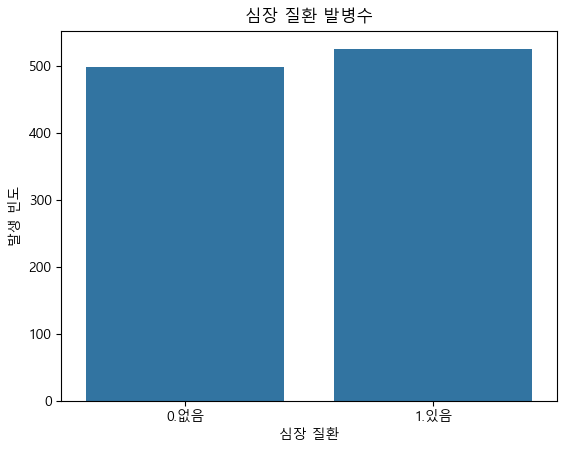

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows의 경우 'Malgun Gothic' 사용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

y_data = df['target']

sns.countplot(data = df , x = 'target')
plt.title('심장 질환 발병수')
plt.xlabel('심장 질환')
plt.ylabel('발생 빈도')

plt.xticks([0, 1], ['0.없음', '1.있음'])  # x축 레이블 변경
plt.show()


### 상관관계 분석

c:\Users\302\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\302\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


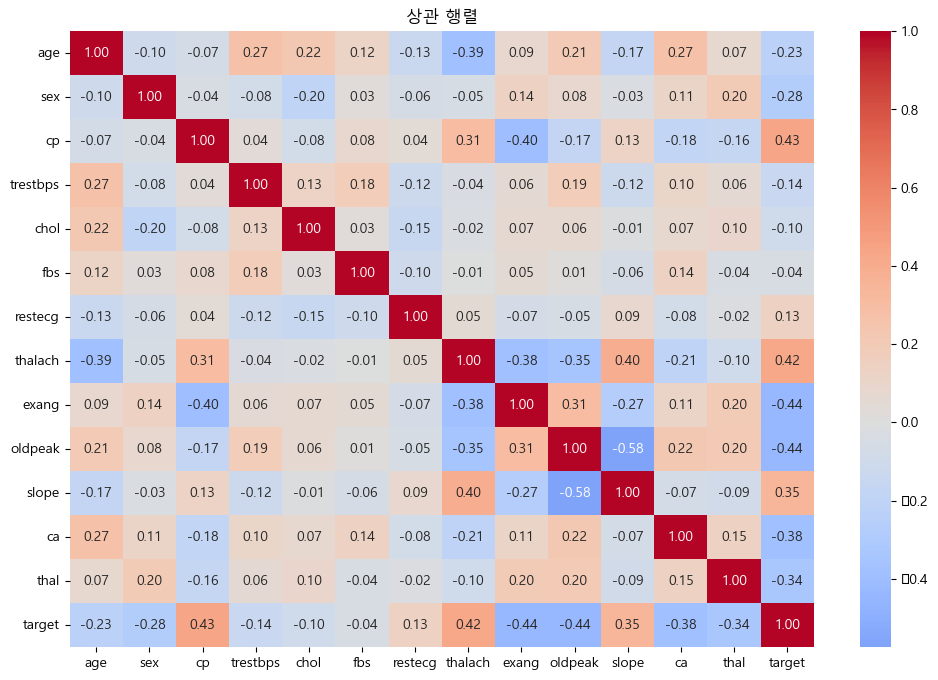

In [6]:
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('상관 행렬')
plt.show()



# Automatically Visualize Dataset 자동 시각화

AutoViz 설치

https://github.com/AutoViML/AutoViz

In [27]:


from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
plt.style.use('dark_background')

AV = AutoViz_Class()

AV.AutoViz(
    filename='',
    dfte=df,
    depVar='target',
    verbose=2, # 0: 간단히 표시; 1: 자세히 표시; 2: 파일로 저장
    max_rows_analyzed=df.shape[0],
    max_cols_analyzed=df.shape[1])

Shape of your Data Set loaded: (1025, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['oldpeak']
    Integer-Categorical Columns: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'slope', 'ca', 'thal']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['sex', 'fbs', 'exang']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in dat

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,13,29.000000,77.000000,No issue
sex,int64,0.000000,0,0.000000,1.000000,No issue
cp,int64,0.000000,1,0.000000,3.000000,No issue
trestbps,int64,0.000000,16,94.000000,200.000000,Column has 9 outliers greater than upper bound (170.00) or lower than lower bound(90.00). Cap them or remove them.
chol,int64,0.000000,50,126.000000,564.000000,Column has 5 outliers greater than upper bound (370.38) or lower than lower bound(115.38). Cap them or remove them.
fbs,int64,0.000000,0,0.000000,1.000000,No issue
restecg,int64,0.000000,0,0.000000,2.000000,No issue
thalach,int64,0.000000,30,71.000000,202.000000,Column has 1 outliers greater than upper bound (215.12) or lower than lower bound(84.12). Cap them or remove them.
exang,int64,0.000000,0,0.000000,1.000000,No issue
oldpeak,float64,0.000000,NA,0.000000,6.200000,Column has 5 outliers greater than upper bound (4.00) or lower than lower bound(-2.40). Cap them or remove them.


All Plots are saved in .\AutoViz_Plots\target
Time to run AutoViz = 3 seconds 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
807,44,1,2,130,233,0,1,179,1,0.40,2,0,2,0
27,58,0,1,136,319,1,0,152,0,0.00,2,2,2,1
77,63,1,0,140,187,0,0,144,1,4.00,2,2,3,1
406,58,1,2,140,211,1,0,165,0,0.00,2,0,2,0
886,61,1,0,120,260,0,1,140,1,3.60,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,49,1,2,118,149,0,0,126,0,0.80,2,3,2,1
192,67,0,2,115,564,0,0,160,0,1.60,1,0,3,0
629,65,1,3,138,282,1,0,174,0,1.40,1,1,2,1
559,67,1,0,120,237,0,1,71,0,1.00,1,0,2,1


# PyCaret을 활용한 데이터 전처리

In [8]:
# PyCaret을 사요해 데이터 전처리

from pycaret.classification import *

clf_setup = setup(
    data =df,
    target='target',
    session_id=123,
    silent = True
)

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=7, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

# LazyPredict

AutoML with scikit-learn

https://lazypredict.readthedocs.io/en/latest/

자동으로 베스트 모델 찾아주는 패키지

In [ ]:
# AutoViz 객체 생성
AV = AutoViz_Class()

# 데이터프레임을 사용하여 시각화
df = ...  # 데이터프레임 로드
AV.AutoViz(
    filename='',  # 파일 경로 (데이터프레임을 사용할 경우 빈 문자열)
    dfte=df,      # 데이터프레임
    depVar='target',  # 종속 변수 (타겟 변수)
    verbose=2,    # 출력 수준 (0: 간단히, 1: 자세히, 2: 파일 저장)
    max_rows_analyzed=1500,  # 분석할 최대 행 수
    max_cols_analyzed=30     # 분석할 최대 열 수
)

In [ ]:
#!pip install scikit-learn==0.23.1
%pip install -q lazypredict

### 데이터 준비

In [ ]:
y_data = df.pop('target')
x_data = df

print(x_data.shape)
print(y_data.shape)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.2,
    random_state=2022,
    stratify=y_data) # 클래스 비율을 동일하게 분할한다

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

### 모델 성능 자동 비교

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, predictions=True)

models, predictions = clf.fit(x_train, x_test, y_train, y_test)

models

### 모델별 테스트 데이터 예측값

In [ ]:
predictions.head()

### 모델별 분류 리포트

In [ ]:
from sklearn.metrics import classification_report

for model_name in predictions.columns.tolist():
    print(f'{model_name}')
    print(classification_report(y_test, predictions[model_name]))

### 성능 좋은 LightGBM 사용

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier()

lgbm.fit(x_train, y_train)

y_pred = lgbm.predict(x_test)

accuracy_score(y_pred, y_test)

# 파라미터 자동 튜닝

### SVM 튜닝없이 돌렸을때

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test)

pipe = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", SVC())
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

accuracy_score(y_pred, y_test)

In [ ]:
pipe['classifier'].get_params()

## Scikit-Optimize

Scikit-learn 의 머신러닝 모델들의 파라미터 자동 튜닝 패키지

https://scikit-optimize.github.io/stable/

In [ ]:
from skopt import BayesSearchCV

pipe = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", SVC())
])

opt = BayesSearchCV(
    pipe,
    {
        'classifier__C': (1e-1, 1e+1, 'log-uniform'),
        'classifier__gamma': (1e-6, 1e+1, 'log-uniform'),
        'classifier__degree': (1, 8),  # integer valued parameter
        'classifier__kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=8,
    cv=3
)

opt.fit(x_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(x_test, y_test))

In [ ]:
opt.best_params_